In [1]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Importing some useful libraries and scripts

import pandas as pd # For dataframe related tasks
import numpy as np # For numerical tasks
import seaborn as sns # For data visualization

# For train test spliting while training our model
from sklearn.model_selection import train_test_split

import pickle # For model saving

# A module for model training
from sklearn import svm

# A module for accuracy score checking
from sklearn.metrics import accuracy_score

In [3]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data'

In [4]:
# Checking our data

df = pd.read_csv(data_folder_path + '/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df = df.drop(columns = 'Loan_ID',axis = 1)
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
def refine_dataframe(df):
  columns = df.columns
  categorical_columns = {}
  for column in columns:
    if df[column].dtype == 'O':
      categorical_columns[column] = list(df[column].value_counts().index)

  for column in columns:
    if df[column].dtype == 'O':
      category = categorical_columns[column]
      for i in range(len(category)):
        df[column] = df[column].apply(lambda x: i if x == category[i] else x)
      
  for column in categorical_columns.keys():
    df[column] = df[column].astype(int)

  return df

In [7]:
df = df.dropna()
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df = refine_dataframe(df)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,2,0,0,4583,1508.0,128.0,360.0,1.0,2,1
2,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,0
3,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0
4,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0
5,0,0,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0


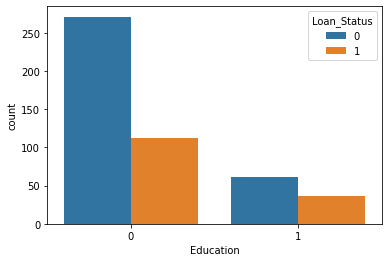

In [9]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

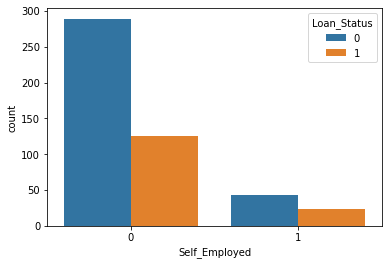

In [10]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

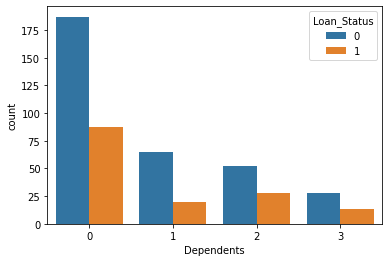

In [11]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

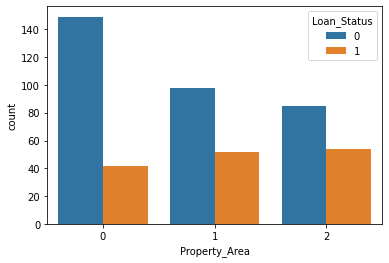

In [12]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [13]:
X = df.drop(columns = 'Loan_Status',axis = 1)
y = df['Loan_Status']
print(X.shape)
print(y.shape)

(480, 11)
(480,)


In [14]:
'''
 Train test splitting using (80,20) ratio
 We used the argument stratify to have a standardized train test split
 i.e. the train set will have a balanced 0 and 1 ratio
'''

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify = y,
                                                    test_size = 0.1,
                                                    random_state = 42)

In [15]:
# Instantiating and training the logistic regression model

classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
# Checking the training set accuracy 

pred = classifier.predict(X_train)
accuracy = round(accuracy_score(pred,y_train),2)
print(f'Accuracy of the training set is: {int(accuracy * 100)}%')

Accuracy of the training set is: 78%


In [17]:
# Checking the test set accuracy to check if there is any overfitting

pred = classifier.predict(X_test)
accuracy = round(accuracy_score(pred,y_test),2)
print(f'Accuracy of the test set is: {int(accuracy * 100)}%')

Accuracy of the test set is: 79%


In [18]:
# Lets take some values in the test set and predict

check_data = X_test[:5]
prediction = classifier.predict(check_data)

In [19]:
# Checking the accuracy of our sampled data

accurate_results = np.array(prediction == y_test[:5],dtype=int)
print('The model accurately predicted {} out of {}'.format(
    np.sum(accurate_results),
    len(accurate_results)
))

The model accurately predicted 5 out of 5


In [22]:
# Saving the model 

file_name = 'models/loan_status_model.h5'
with open(file_name,'wb') as f:
  pickle.dump(classifier,f)